Rank: 5
RMSE: 0.1092
PSNR: 19.2342 dB


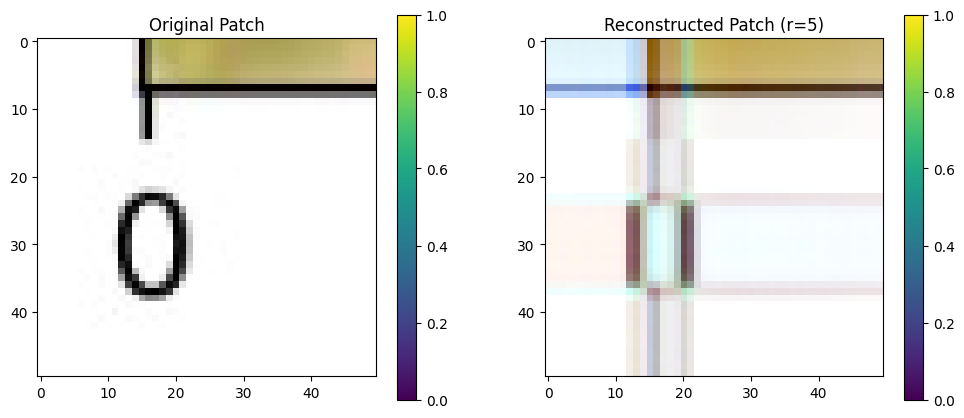

Rank: 10
RMSE: 0.0597
PSNR: 24.4764 dB


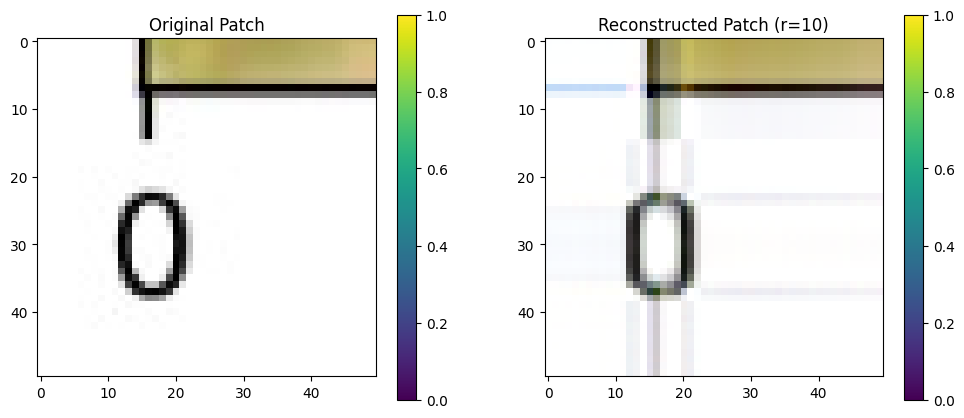

Rank: 25
RMSE: 0.0397
PSNR: 28.0186 dB


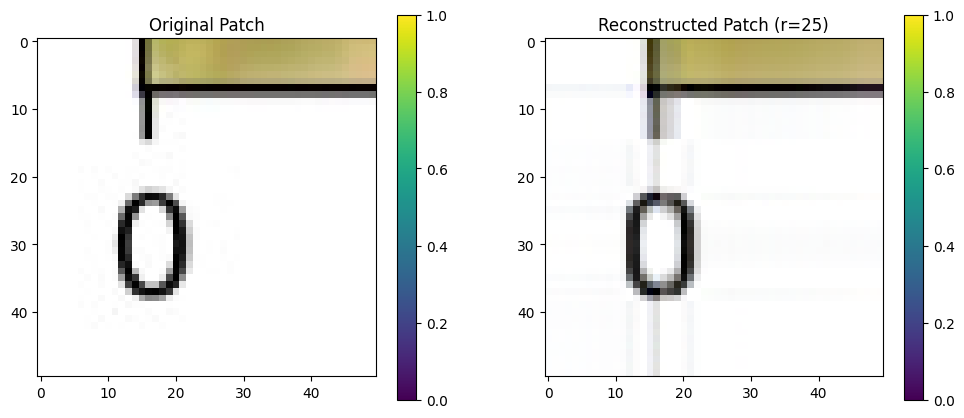

Rank: 50
RMSE: 0.0305
PSNR: 30.3033 dB


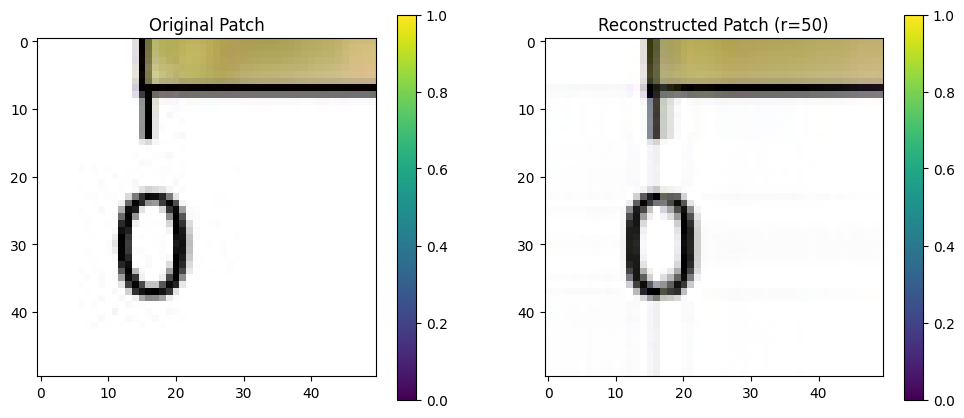

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics import mean_squared_error
import os

def initialize_matrices(N, r):
    A = np.random.normal(0, 0.01, (N, r))
    B = np.random.normal(0, 0.01, (r, N))
    return A, B

def gradient_descent(X, A, B, lr, epochs, reg_lambda=0.01):
    for epoch in range(epochs):
        X_approx = np.dot(A, B)
        error = X - X_approx
        dA = -2 * np.dot(error, B.T) + reg_lambda * A
        dB = -2 * np.dot(A.T, error) + reg_lambda * B

        max_norm = 1.0
        dA = np.clip(dA, -max_norm, max_norm)
        dB = np.clip(dB, -max_norm, max_norm)

        A -= lr * dA
        B -= lr * dB

        if np.any(np.isnan(A)) or np.any(np.isnan(B)) or np.any(np.isinf(A)) or np.any(np.isinf(B)):
            raise ValueError("NaN or Inf encountered in matrix A or B during gradient descent")

    return A, B

def compute_rmse(original, reconstructed):
    return np.sqrt(mean_squared_error(original.flatten(), reconstructed.flatten()))

def compute_psnr(original, reconstructed):
    mse = mean_squared_error(original.flatten(), reconstructed.flatten())
    if mse == 0:
        return float('inf')
    max_pixel = 1.0 
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def extract_patch(image, patch_size=50):
    """ Extract a random patch of the given size from the image. """
    img_height, img_width, _ = image.shape
    start_x = 50
    start_y = 565
    return image[start_y:start_y + patch_size, start_x:start_x + patch_size, :]

img_path = os.path.join(os.getcwd(), 'task5.jpg')
img = io.imread(img_path) / 255.0  # Normalize to [0, 1]

# Extract a random 50x50 patch
patch_size = 50
X = extract_patch(img, patch_size)

r_values = [5, 10, 25, 50]
epochs = 1000
lr = 0.001  
reg_lambda = 0.01  
for r in r_values:
    A_r, B_r = initialize_matrices(patch_size, r)
    A_g, B_g = initialize_matrices(patch_size, r)
    A_b, B_b = initialize_matrices(patch_size, r)
    try:
        for channel in range(3): 
            if channel == 0:
                A_r, B_r = gradient_descent(X[:, :, 0], A_r, B_r, lr, epochs, reg_lambda)
            elif channel == 1:
                A_g, B_g = gradient_descent(X[:, :, 1], A_g, B_g, lr, epochs, reg_lambda)
            else:
                A_b, B_b = gradient_descent(X[:, :, 2], A_b, B_b, lr, epochs, reg_lambda)
        
        X_approx_r = np.dot(A_r, B_r)
        X_approx_g = np.dot(A_g, B_g)
        X_approx_b = np.dot(A_b, B_b)
        X_approx_r = np.clip(X_approx_r, 0, 1)
        X_approx_g = np.clip(X_approx_g, 0, 1)
        X_approx_b = np.clip(X_approx_b, 0, 1)
   
        X_approx = np.stack((X_approx_r, X_approx_g, X_approx_b), axis=-1)

        rmse = compute_rmse(X, X_approx)
        psnr = compute_psnr(X, X_approx)


        print(f"Rank: {r}")
        print(f"RMSE: {rmse:.4f}")
        print(f"PSNR: {psnr:.4f} dB")

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Patch")
        plt.imshow(X)
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.title(f"Reconstructed Patch (r={r})")
        plt.imshow(X_approx)
        plt.colorbar()
        plt.show()
    except ValueError as e:
        print(f"An error occurred for rank {r}: {e}")


Rank: 5
RMSE: 0.1169
PSNR: 18.6421 dB


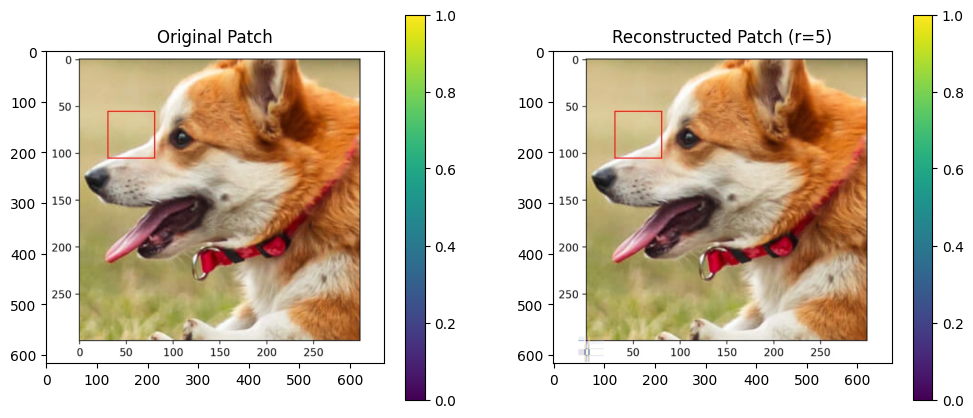

Rank: 10
RMSE: 0.0586
PSNR: 24.6418 dB


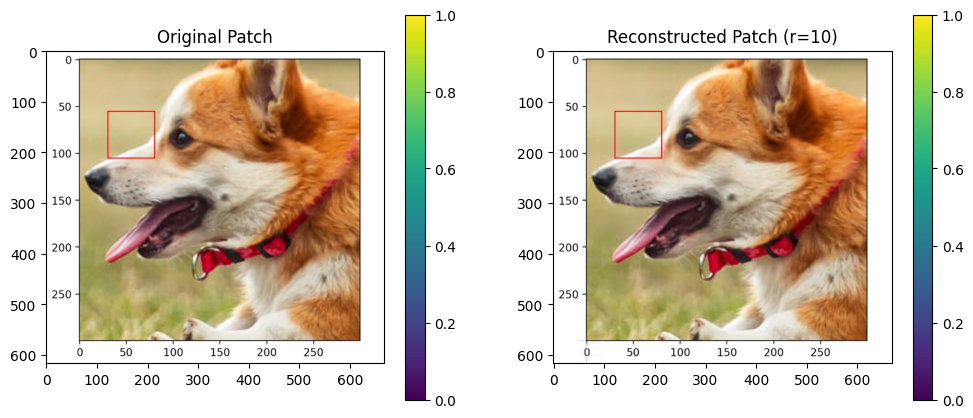

Rank: 25
RMSE: 0.0399
PSNR: 27.9730 dB


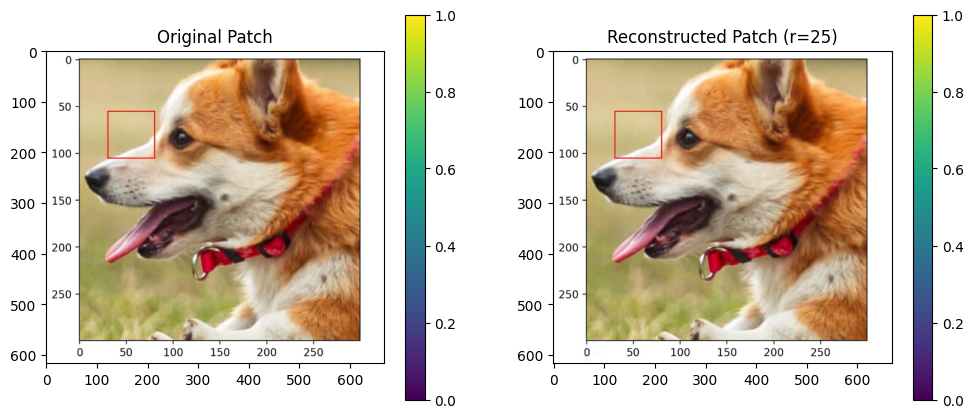

Rank: 50
RMSE: 0.0304
PSNR: 30.3453 dB


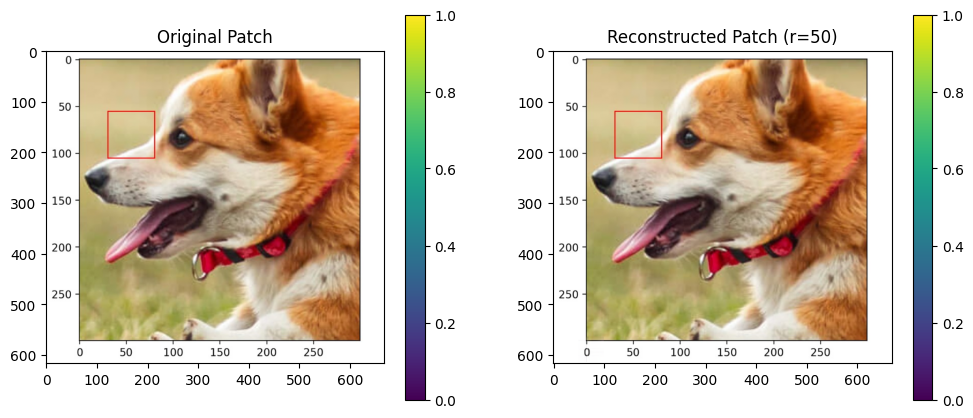

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics import mean_squared_error
import os



def initialize_matrices(N, r):
    A = np.random.normal(0, 0.01, (N, r))
    B = np.random.normal(0, 0.01, (r, N))
    return A, B

def gradient_descent(X, A, B, lr, epochs, reg_lambda=0.01):
    for epoch in range(epochs):
        X_approx = np.dot(A, B)
        error = X - X_approx
        dA = -2 * np.dot(error, B.T) + reg_lambda * A
        dB = -2 * np.dot(A.T, error) + reg_lambda * B

        max_norm = 1.0
        dA = np.clip(dA, -max_norm, max_norm)
        dB = np.clip(dB, -max_norm, max_norm)

        A -= lr * dA
        B -= lr * dB

        if np.any(np.isnan(A)) or np.any(np.isnan(B)) or np.any(np.isinf(A)) or np.any(np.isinf(B)):
            raise ValueError("NaN or Inf encountered in matrix A or B during gradient descent")

    return A, B

def compute_rmse(original, reconstructed):
    return np.sqrt(mean_squared_error(original.flatten(), reconstructed.flatten()))

def compute_psnr(original, reconstructed):
    mse = mean_squared_error(original.flatten(), reconstructed.flatten())
    if mse == 0:
        return float('inf')
    max_pixel = 1.0 
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def extract_patch(image, patch_size=50):
    """ Extract a random patch of the given size from the image. """
    img_height, img_width, _ = image.shape
    start_x = 50
    start_y = 565
    return image[start_y:start_y + patch_size, start_x:start_x + patch_size, :]


img_path = os.path.join(os.getcwd(), 'task5.jpg')
img = io.imread(img_path) / 255.0  # Normalize to [0, 1]

# Extract a random 50x50 patch
patch_size = 50
X = extract_patch(img, patch_size)

r_values = [5, 10, 25, 50]
epochs = 1000
lr = 0.001  
reg_lambda = 0.01  
for r in r_values:
    A_r, B_r = initialize_matrices(patch_size, r)
    A_g, B_g = initialize_matrices(patch_size, r)
    A_b, B_b = initialize_matrices(patch_size, r)
    try:
        for channel in range(3): 
            if channel == 0:
                A_r, B_r = gradient_descent(X[:, :, 0], A_r, B_r, lr, epochs, reg_lambda)
            elif channel == 1:
                A_g, B_g = gradient_descent(X[:, :, 1], A_g, B_g, lr, epochs, reg_lambda)
            else:
                A_b, B_b = gradient_descent(X[:, :, 2], A_b, B_b, lr, epochs, reg_lambda)
        
        X_approx_r = np.dot(A_r, B_r)
        X_approx_g = np.dot(A_g, B_g)
        X_approx_b = np.dot(A_b, B_b)
        X_approx_r = np.clip(X_approx_r, 0, 1)
        X_approx_g = np.clip(X_approx_g, 0, 1)
        X_approx_b = np.clip(X_approx_b, 0, 1)
   
        X_approx = np.stack((X_approx_r, X_approx_g, X_approx_b), axis=-1)

        rmse = compute_rmse(X, X_approx)
        psnr = compute_psnr(X, X_approx)

        print(f"Rank: {r}")
        print(f"RMSE: {rmse:.4f}")
        print(f"PSNR: {psnr:.4f} dB")

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Patch")
        plt.imshow(img)
        plt.colorbar()

        new_img = img.copy()
        start_x = 50
        start_y = 565
        new_img[start_y:start_y + patch_size, start_x:start_x + patch_size] = X_approx
        
        plt.subplot(1, 2, 2)
        plt.title(f"Reconstructed Patch (r={r})")
        plt.imshow(new_img)
        plt.colorbar()
        plt.show()
    except ValueError as e:
        print(f"An error occurred for rank {r}: {e}")
